diann 2023 1 task

dipromats 2023 task 3 is most specific out of 1,2,3. thus task 3 can be used on its own

exist 2022 task 2 is more specifc than task 1, thus task 2 can be used on its own

exist 2023 all 3 tasks required

sqac 2024 1 task


In [32]:
import os
from pathlib import Path

from dotenv import load_dotenv
from datasets import Dataset, concatenate_datasets
import pandas as pd

print("Loaded .env:", load_dotenv("../../.env", override=True))
data_dir = Path(os.environ["PROJECT_DIR"]) / "data" / "host"

LANG = "en"
SPLIT = 'train'

Loaded .env: True


In [35]:
LANG = "en"

all_ds = [
    Dataset.from_parquet(str(data_dir / "diann_2023" / f"{SPLIT}_t1_{LANG}_formatted.parquet")),
    Dataset.from_parquet(str(data_dir / "dipromats_2023" / f"{SPLIT}_t3_{LANG}_formatted.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2022" / f"{SPLIT}_t2_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t1_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t2_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t3_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "sqac_squad_2024" / f"{SPLIT}_t1_{LANG}_formatted.parquet")).shuffle().select(range(10000)),
]

LANG = "es"
all_ds2 = [
    Dataset.from_parquet(str(data_dir / "diann_2023" / f"{SPLIT}_t1_{LANG}_formatted.parquet")),
    Dataset.from_parquet(str(data_dir / "dipromats_2023" / f"{SPLIT}_t3_{LANG}_formatted.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2022" / f"{SPLIT}_t2_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t1_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t2_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "exist_2023" / f"{SPLIT}_t3_{LANG}_formatted2.parquet")),
    Dataset.from_parquet(str(data_dir / "sqac_squad_2024" / f"{SPLIT}_t1_{LANG}_formatted.parquet")),
]

ds = concatenate_datasets(all_ds+all_ds2)

In [36]:
ds

Dataset({
    features: ['text', 'response'],
    num_rows: 69123
})

In [4]:
import random

print(random.choice(ds))

{'text': 'You are an excellent assistant at categorizing propaganda in tweets. Propaganda is defined as:\ninformation, especially of a biased or misleading nature, used to promote or publicize a particular political cause or point of view.\n\nYou will need to decide which of the following applies to the tweet. It could be one or more of the following.\n\nA. Appeal to commonality - Ad populum: the tweet appeals to the will, the tradition or the history of a community to support an argument. e.g. "The leadership of the #CPC is the choice of history and of the Chinese people."\nB. Appeal to commonality - Flag Waving: the tweet includes hyperbolic praise of a nation, worships a patriotic symbol, exhibits self-praise, or portrays someone as a hero. e.g. "The European Union is the best example, in the history of the world, of conflict resolution."\nC. Discrediting the opponent - Name Calling/Labelling: the author refers to someone or something with pejorative labels. e.g. "The #US is the gra

In [25]:
from transformers import AutoTokenizer

llama = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-1B-Instruct")
qwen = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-1.5B-Instruct")
mistral = AutoTokenizer.from_pretrained("mistralai/Ministral-8B-Instruct-2410")

In [6]:
ids = mistral.encode("hello \n1. asdf\n2.\n3.\n4.\n5.\n6.\n7.\n8.\n9.\n10.")
tokens = mistral.convert_ids_to_tokens(ids)

list(zip(tokens, ids))

[('<s>', 1),
 ('hello', 29706),
 ('Ġ', 1032),
 ('Ċ', 1010),
 ('1', 1049),
 ('.', 1046),
 ('Ġas', 1435),
 ('df', 7785),
 ('Ċ', 1010),
 ('2', 1050),
 ('.Ċ', 1626),
 ('3', 1051),
 ('.Ċ', 1626),
 ('4', 1052),
 ('.Ċ', 1626),
 ('5', 1053),
 ('.Ċ', 1626),
 ('6', 1054),
 ('.Ċ', 1626),
 ('7', 1055),
 ('.Ċ', 1626),
 ('8', 1056),
 ('.Ċ', 1626),
 ('9', 1057),
 ('.Ċ', 1626),
 ('1', 1049),
 ('0', 1048),
 ('.', 1046)]

6389


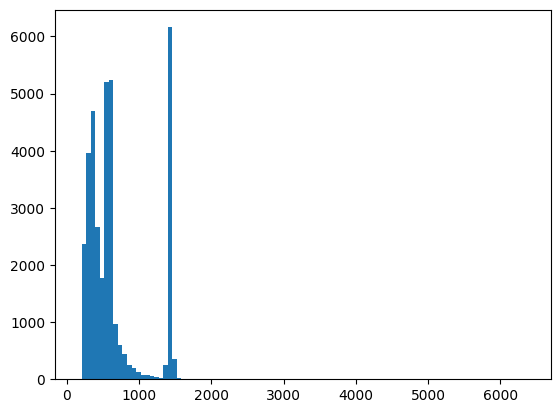

6335


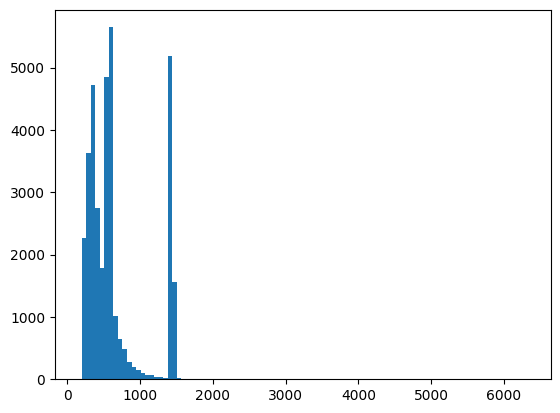

5701


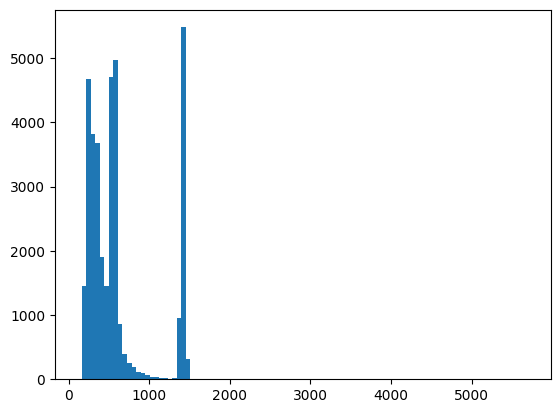

In [9]:
import matplotlib.pyplot as plt


tokenizers = [llama, qwen, mistral]

def tokenize(example, tokenizer):
    tokens = tokenizer.apply_chat_template([{"role": "user", "content": example["text"]}, {"role": "assistant", "content":example["response"]}])

    return {
        "length": len(tokens)
    }

for tokenizer in tokenizers:
    temp_ds = ds.map(tokenize, fn_kwargs={"tokenizer": tokenizer}, num_proc=10)
    print(max(temp_ds["length"]))
    plt.hist(temp_ds["length"], bins=100)
    plt.show()

In [31]:
ids = mistral.encode("\nA \nB \nC \nD \nE \nF \nG \nH \nI \nJ \nK \nL \nM \nN \nO \nP", add_special_tokens=False)
tokens = mistral.convert_ids_to_tokens(ids)
[x for x in list(zip(tokens, ids)) if x[0] not in {"Ċ", "Ġ"}]

[('A', 1065),
 ('B', 1066),
 ('C', 1067),
 ('D', 1068),
 ('E', 1069),
 ('F', 1070),
 ('G', 1071),
 ('H', 1072),
 ('I', 1073),
 ('J', 1074),
 ('K', 1075),
 ('L', 1076),
 ('M', 1077),
 ('N', 1078),
 ('O', 1079),
 ('P', 1080)]

In [ ]:
tokenizer.apply_chat_template([{"role": "user", "content": "1"}, {"role": "assistant", "content": "2"}], tokenize=False)

'<s>[INST]1[/INST]2</s>'

In [40]:
tokenizer.apply_chat_template([{"role": "user", "content": "1"}, {"role": "assistant", "content": "2"}])

[1, 3, 1049, 4, 1050, 2]

In [61]:
dataset_names = []
names = ["diann", "dipromats", "exist2022", "exist2023", "exist2023", "exist2023", "sqac"]

for d, n in zip(all_ds, names):
    dataset_names.extend([n]*len(d))

In [62]:
from collections import Counter

Counter(dataset_names)

Counter({'sqac': 15036,
         'exist2023': 8872,
         'dipromats': 6726,
         'exist2022': 4560,
         'diann': 400})

In [17]:
temp_ds = temp_ds.add_column("dataset_name", dataset_names)

In [18]:
import numpy as np

for n in names:
    temp = temp_ds.filter(lambda x: x["dataset_name"] == n, num_proc=10)
    q = np.quantile(temp["length"], [0.5, 0.75, 0.9, 0.95, 1.])
    print(n, q)

Filter (num_proc=10):   0%|          | 0/35594 [00:00<?, ? examples/s]

diann [ 462.5  541.   622.8  678.  1028. ]


Filter (num_proc=10):   0%|          | 0/35594 [00:00<?, ? examples/s]

dipromats [1416. 1430. 1442. 1450. 1520.]


Filter (num_proc=10):   0%|          | 0/35594 [00:00<?, ? examples/s]

exist2022 [561. 582. 594. 602. 857.]


Filter (num_proc=10):   0%|          | 0/35594 [00:00<?, ? examples/s]

exist2023 [345. 552. 583. 595. 904.]
exist2023 [345. 552. 583. 595. 904.]
exist2023 [345. 552. 583. 595. 904.]


Filter (num_proc=10):   0%|          | 0/35594 [00:00<?, ? examples/s]

sqac [ 373.    503.    650.    762.25 5701.  ]


In [37]:
output_dir = data_dir / "v3"

ds.to_parquet(output_dir / f"{SPLIT}_both.parquet")

Creating parquet from Arrow format:   0%|          | 0/70 [00:00<?, ?ba/s]

187247806

In [14]:
with open(output_dir / "README.md", "w") as f:
    f.write("""---
language:
  - en
configs:
  - config_name: default
    data_files:
      - split: train
        path: train_both.parquet
      - split: val
        path: val_both.parquet
---
combined, prompts v2
            """)

In [19]:
token = os.environ["HF_WRITE_PERSONAL"]

folder = str(output_dir)

!huggingface-cli upload nbroad/odesia-combined-v2 $folder --private --token $token --repo-type dataset

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Consider using `hf_transfer` for faster uploads. This solution comes with some limitations. See https://huggingface.co/docs/huggingface_hub/hf_transfer for more details.
Start hashing 3 files.
Finished hashing 3 files.
val_both.parquet: 100%|████████████████████| 7.41M/7.41M [00:01<00:00, 7.06MB/s]
Removing 2 file(s) from commit that have not changed.
https://huggingface.co/datasets/nbroad/odesia-combined-v2/tree/main/.
